<a href="https://colab.research.google.com/github/hoagn-vu/SNN-Face-Recognition/blob/main/Project_AI_CuoiKy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Set up



## 1.1. Cài đặt thư viện phụ thuộc


In [ ]:
!pip install numpy>=1.25.0
!pip install tensorflow==2.12.0 tensorflow-cpu==2.12.0 opencv-python matplotlib

## 1.2.Tải thư viện


In [2]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Import tensorflow dependencies - Functional API
!pip install matplotlib-venn
from tensorflow.keras.models import Model
from tensorflow.keras.layers  import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

## 1.3.Khởi tạo GPU Growth

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.4.Tạo Folder

In [5]:
!git clone https://github.com/hoagn-vu/test-colab.git

Cloning into 'test-colab'...
remote: Enumerating objects: 13994, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13994 (delta 5), reused 16 (delta 3), pack-reused 13976
Receiving objects: 100% (13994/13994), 192.36 MiB | 27.27 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (13977/13977), done.


In [6]:
# Đường dẫn đến thư mục chứa ảnh đã clone từ GitHub
POS_PATH = '/content/test-colab/positive'
NEG_PATH = '/content/test-colab/negative'
ANC_PATH = '/content/test-colab/anchor'

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Liệt kê tất cả các file trong thư mục ảnh
image_files = [f for f in os.listdir(POS_PATH) if os.path.isfile(os.path.join(POS_PATH, f))]

# Duyệt qua từng tệp ảnh trong danh sách và nối chúng với đường dẫn thư mục
for file_name in image_files:
    full_path = os.path.join(ANC_PATH, file_name)
    print(full_path)

In [ ]:
# Khởi tạo đường dẫn
# POS_PATH = os.path.join('data', 'positive')
# NEG_PATH = os.path.join('data', 'negative')
# ANC_PATH = os.path.join('data', 'anchor')

In [ ]:
# Tạo folder
# os.makedirs(POS_PATH)
# os.makedirs(NEG_PATH)
# os.makedirs(ANC_PATH)

# 2.Tạo file ảnh Positives và Anchors

## 2.1

In [ ]:
# for directory in os.listdir('lfw'):
#   for file in os.listdir(os.path.join('lfw', directory)):
#     EX_PATH = os.path.join('lfw', directory, file)
#     NEW_PATH = os.path.join(NEG_PATH, file)
#     os.replace(EX_PATH, NEW_PATH)

## 2.2.Tạo Positive và Anchor

In [ ]:
# import uuid

In [ ]:
# uuid.uuid1()

In [ ]:
# import cv2
# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#   ret, frame = cap.read()

#   frame = frame[120:120+250,200:200+250,:]

#   if cv2.waitKey(1) & 0XFF == ord('a'):
#     imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
#     cv2.imwrite(imgname, frame)


#   if cv2.waitKey(1) & 0XFF == ord('p'):
#     imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
#     cv2.imwrite(imgname, frame)


#   cv2.imshow('Image Collection', frame)

#   if cv2.waitKey(1) & 0XFF == ord('q'):
#     break

# cap.release()

# cv2.destroyAllWindows()

# 2X. Data Augmentation

In [ ]:
# def data_aug(img):
#     data = []
#     for i in range(9):
#         img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
#         img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
#         # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
#         img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
#         img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
#         img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))

#         data.append(img)

#     return data

In [ ]:
import os
import uuid

In [ ]:
# img_path = os.path.join(ANC_PATH, '924e839c-135f-11ec-b54e-a0cec8d2d278.jpg')
# img = cv2.imread(img_path)
# augmented_images = data_aug(img)

# for image in augmented_images:
#     cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [ ]:
# for file_name in os.listdir(os.path.join(POS_PATH)):
#     img_path = os.path.join(POS_PATH, file_name)
#     img = cv2.imread(img_path)
#     augmented_images = data_aug(img)

#     for image in augmented_images:
#         cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

# 3. Tiền xử lí hình ảnh

## 3.1.Lấy đường dẫn thư mục hình ảnh

In [8]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(250)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(250)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(250)

In [9]:
dir_test = anchor.as_numpy_iterator()

In [10]:
print(dir_test.next())

b'/content/test-colab/anchor/12698423-0988-11ef-ae71-ecee15d3d43b.jpg'


## 3.2.Tiền xử lí dữ liệu ( Resize & Scale )

In [11]:
def preprocess(file_path):

    # Tải hình ảnh từ đường dẫn
    byte_img = tf.io.read_file(file_path)

    # Tải hình ảnh
    img = tf.io.decode_jpeg(byte_img)

    # Chỉnh size ảnh thành 100x100
    img = tf.image.resize(img, (100, 100))

    # Scale hình ảnh về trong khoarg 0 và 1
    img = img / 255.0

    return img

In [12]:
img = preprocess('/content/test-colab/anchor/13fceeb6-0988-11ef-9668-ecee15d3d43b.jpg')

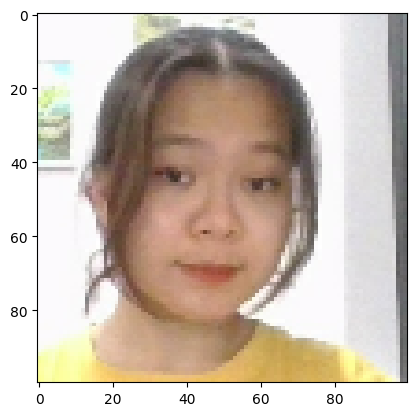

In [13]:
plt.imshow(img)

In [14]:
anchor.map(preprocess)
negative.map(preprocess)
positive.map(preprocess)

<_MapDataset element_spec=TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None)>

## 3.3 Gán nhãn dataset

In [15]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [16]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [17]:
samples = data.as_numpy_iterator()

In [18]:
exampple = samples.next()

In [19]:
exampple

(b'/content/test-colab/anchor/14d57f39-0988-11ef-8ea5-ecee15d3d43b.jpg',
 b'/content/test-colab/positive/456dec69-0987-11ef-88dd-ecee15d3d43b.jpg',
 1.0)

## 3.4 Xây dựng phân vùng huấn luyện và thử nghiệm

In [20]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [21]:
res = preprocess_twin(*exampple)

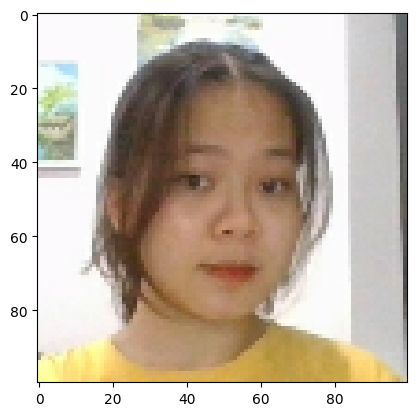

In [22]:
plt.imshow(res[1])

In [23]:
res[2]

1.0

In [24]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [25]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [26]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# 4.Xây dựng mô hình

## 4.1.Xây dựng Embedding Layer

In [27]:
inp = Input(shape=(105,105,3), name = 'input_1')

In [28]:
 c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [29]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)


In [30]:
def make_embedding():
  inp = Input(shape=(100,100,3), name = 'input_1')

  # Khối đầu tiên
  c1 = Conv2D(64, (10,10), activation='relu')(inp)
  m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

  # Khối thứ hai
  c2 = Conv2D(128, (7,7), activation='relu')(m1)
  m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

  # Khối thứ ba
  c3 = Conv2D(128, (4,4), activation='relu')(m2)
  m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

  # Khối thứ tư
  c4 = Conv2D(256, (4,4), activation='relu')(m3)
  f1 = Flatten()(c4)
  d1 = Dense(4096, activation='sigmoid')(f1)

  return Model(inputs=[inp], outputs=[d1], name='embedding')

In [31]:
embedding = make_embedding()

In [32]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 128)       26

## 4.2.Xây dựng Distance Layer

In [33]:
# Siamese L1 Distance class
class L1Dist(Layer):
  def __init__(self, **kwargs):
    super().__init__()

  def call(self, input_embedding, validation_embedding):
    return tf.math.abs(input_embedding - validation_embedding)

In [34]:
l1 = L1Dist()

In [ ]:
l1(anchor_embedding, validation_embedding)

## 4.3.xây dựng Siamese Model

In [36]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [37]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [38]:
siamese_layer = L1Dist()

In [39]:
distances = siamese_layer(inp_embedding, val_embedding)

In [40]:
classifier = Dense(1, activation='sigmoid')(distances)

In [41]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

In [42]:
def make_siamese_model():

  # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))

    # Validation image in the network
    validation_image = Input(name='validation_img', shape=(100,100,3))

    # Kết hợp các thành phần siamese distance
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))

    # classification layer
    classifier = Dense(1, activation='sigmoid')(distances)

    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')


In [43]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [ ]:
siamese_network.summary()

# 5.Huấn luyện

## 5.1.Setup Loss and Optimizer

In [45]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [46]:
opt = tf.keras.optimizers.Adam(1e-4)

## Thiết lập checkpoints

In [47]:
checkpoint_dir = '/content/test-colab/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_network)

## 5.3. Xây dựng các bước huấn luyện

In [ ]:
test_batch = train_data.as_numpy_iterator()
batch_1 = test_batch.next()


In [58]:
x = batch_1[:2]

In [60]:
np.array(x).shape

(2, 16, 100, 100, 3)

In [61]:
@tf.function
def train_step(batch):
  with tf.GradientTape() as tape:
    # Lấy hình ảnh anchor, negative và positive
    x = batch[:2]
    # Lấy nhãn
    y = batch[2]

    #
    yhat = siamese_network(x, training = True)
    # Tính toán sự mất mát
    loss = binary_cross_loss(y, yhat)
  print(loss)

  # tính toán gradients ( độ dốc )
  grad = tape.gradient(loss, siamese_network.trainable_variables)

  # tính toán trọng số cập nhật và áp dụng mô hình siamese
  opt.apply_gradient(zip(grad, siamese_network.trainable_variables))

  return loss

## 5.4. Xây dựng vòng lặp huấn luyện

In [ ]:
def train(data, EPOCHS):
  # vòng lặp thông qua epochs
  for epoch in range(1, EPOCHS +1):
    print('\n Epoch {}/{}'.format(epoch, EPOCHS))
    progbar = tf.keras.utils.Progbar(len(data))

    # vòng lặp thông qua các lô (batch)
    for idx, batch in enumerate(data):
      train_step(batch)
      progbar.update(idx+1)

    if epoch % 10 ==0:
      checkpoint.save(file_prefix=checkpoint_prefix)


## 5.5.